In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

df1920 = pd.read_csv('./2019-2020.csv')
df1819 = pd.read_csv('./2018-2019.csv')
df1718 = pd.read_csv('./2017-2018.csv')
df1617 = pd.read_csv('./2016-2017.csv')
df1516 = pd.read_csv('./2015-2016.csv')
df1415 = pd.read_csv('./2014-2015.csv')
df1920.head()

,Unnamed: 0,player_name,teams_played_for,league,games,minutes_played,goals,npg,assists,xG,...,xG90,xA90,npxG90,position,shots,key_passes,yellow_cards,red_cards,xGBuildup,xGChain
0,0,Jamie Vardy,Leicester,EPL,35,3034,23,19,5,18.903537,...,0.560751,0.188908,0.447855,F S,89,32,3,0,1.724341,21.026607
1,1,Pierre-Emerick Aubameyang,Arsenal,EPL,36,3143,22,20,3,16.352623,...,0.468258,0.128643,0.424668,F M S,93,26,3,1,5.339657,19.964282
2,2,Danny Ings,Southampton,EPL,38,2836,22,21,2,15.659717,...,0.496959,0.090415,0.448647,F M S,93,35,3,0,5.015938,18.488031
3,3,Raheem Sterling,Manchester City,EPL,33,2678,20,20,1,19.799906,...,0.665419,0.242260,0.614257,F M S,100,48,5,0,10.185997,31.442010
4,4,Mohamed Salah,Liverpool,EPL,34,2904,19,16,10,20.663319,...,0.640392,0.270435,0.569622,F S,132,60,1,0,8.425027,31.374198


In [28]:
##total goals
df1920.goals.sum()+df1819.goals.sum()+df1718.goals.sum()+df1617.goals.sum()+df1516.goals.sum()+df1415.goals.sum()

28757

In [2]:
df1920.describe

<bound method NDFrame.describe of       Unnamed: 0                player_name teams_played_for   league  games  \
0              0                Jamie Vardy        Leicester      EPL     35   
1              1  Pierre-Emerick Aubameyang          Arsenal      EPL     36   
2              2                 Danny Ings      Southampton      EPL     38   
3              3            Raheem Sterling  Manchester City      EPL     33   
4              4              Mohamed Salah        Liverpool      EPL     34   
...          ...                        ...              ...      ...    ...   
2656        2656              Janis Antiste         Toulouse  Ligue_1      1   
2657        2657               Kaj Sierhuis            Reims  Ligue_1      1   
2658        2658                Yvann Maçon    Saint-Etienne  Ligue_1      2   
2659        2659            Bruno Guimarães             Lyon  Ligue_1      3   
2660        2660                 Jean Onana            Lille  Ligue_1      1   

     

In [3]:
df1920.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2661 entries, 0 to 2660
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        2661 non-null   int64  
 1   player_name       2661 non-null   object 
 2   teams_played_for  2661 non-null   object 
 3   league            2661 non-null   object 
 4   games             2661 non-null   int64  
 5   minutes_played    2661 non-null   int64  
 6   goals             2661 non-null   int64  
 7   npg               2661 non-null   int64  
 8   assists           2661 non-null   int64  
 9   xG                2661 non-null   float64
 10  xA                2661 non-null   float64
 11  npxG              2661 non-null   float64
 12  xG90              2661 non-null   float64
 13  xA90              2661 non-null   float64
 14  npxG90            2661 non-null   float64
 15  position          2661 non-null   object 
 16  shots             2661 non-null   int64  


In [4]:
num_rows = df1920.shape[0] 
num_cols = df1920.shape[1]
print("Row    number: {}".format(num_rows))
print("Column number: {}".format(num_cols))


Row    number: 2661
Column number: 22


In [5]:
# To check the column names in the dataset
df1920.columns

Index(['Unnamed: 0', 'player_name', 'teams_played_for', 'league', 'games',
       'minutes_played', 'goals', 'npg', 'assists', 'xG', 'xA', 'npxG', 'xG90',
       'xA90', 'npxG90', 'position', 'shots', 'key_passes', 'yellow_cards',
       'red_cards', 'xGBuildup', 'xGChain'],
      dtype='object')

In [6]:
# Data Preparation Step 1: check how many missing values are in the dataset
df1920.isnull().sum()

Unnamed: 0          0
player_name         0
teams_played_for    0
league              0
games               0
minutes_played      0
goals               0
npg                 0
assists             0
xG                  0
xA                  0
npxG                0
xG90                0
xA90                0
npxG90              0
position            0
shots               0
key_passes          0
yellow_cards        0
red_cards           0
xGBuildup           0
xGChain             0
dtype: int64

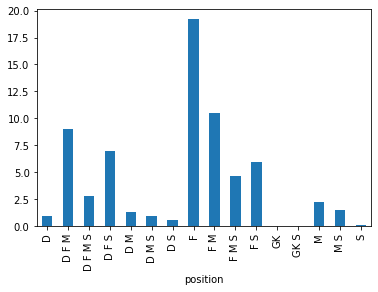

In [10]:
# Question 1: Does players with defensive or offensive positions score mor goals per season
# group df by goals, sum the goals and divide by number of positions to get th mean of the goals for each position 
def get_goals_per_position(df):
    df_goals_position = (df.groupby('position')['goals'].sum()/df.groupby('position')['goals'].count())
    df_goals_position.plot(kind='bar')
    return df_goals_position
df_goals_position19_20 = get_goals_per_position(df1920)
df_goals_position18_19 = get_goals_per_position(df1819)
df_goals_position17_18 = get_goals_per_position(df1718)
df_goals_position16_17 = get_goals_per_position(df1617)
df_goals_position15_16 = get_goals_per_position(df1516)
df_goals_position14_15 = get_goals_per_position(df1415)

,offensive,defensive
14/15,4.203363,2.033668
15/16,5.452146,1.077349
16/17,4.582568,2.150900
17/18,4.442554,0.804088
18/19,3.988092,1.294943
19/20,4.628739,1.013458


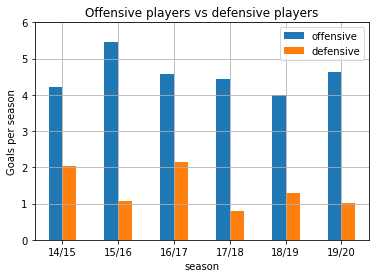

In [57]:
def get_mean_goals(df_goals_position):
    # drop Goalkeeper out of list
    df_goals_by_pos_no_gp = df_goals_position.drop("GK").drop("GK S")
    # filter defensive postions and calculate mean goals per player 
    mean_goals_defensive = df_goals_by_pos_no_gp.filter(like='D', axis=0).mean()
    # get a list of all players with defensive position
    defensive_list = list(df_goals_by_pos_no_gp.filter(like='D', axis=0).index)
    # drop all defensive postions from df_goals_by_pos_no_gp and calculate mean goals per player 
    mean_goals_offensive = df_goals_by_pos_no_gp.drop(defensive_list).mean()
    return mean_goals_defensive, mean_goals_offensive

mean_goals_defensive19_20, mean_goals_offensive19_20 = get_mean_goals(df_goals_position19_20)
mean_goals_defensive18_19, mean_goals_offensive18_19 = get_mean_goals(df_goals_position18_19)
mean_goals_defensive17_18, mean_goals_offensive17_18 = get_mean_goals(df_goals_position17_18)
mean_goals_defensive16_17, mean_goals_offensive16_17 = get_mean_goals(df_goals_position16_17)
mean_goals_defensive15_16, mean_goals_offensive15_16 = get_mean_goals(df_goals_position15_16)
mean_goals_defensive14_15, mean_goals_offensive14_15 = get_mean_goals(df_goals_position14_15)

##create new df with with mean goals per player per season in offensive and defensive positions and plot
offensive = [mean_goals_offensive14_15, mean_goals_offensive15_16, mean_goals_offensive16_17,
             mean_goals_offensive17_18, mean_goals_offensive18_19, mean_goals_offensive19_20]

defensive = [mean_goals_defensive14_15, mean_goals_defensive15_16, mean_goals_defensive16_17,
             mean_goals_defensive17_18, mean_goals_defensive18_19, mean_goals_defensive19_20]

index = ['14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

df_mean_goals = pd.DataFrame({'offensive': offensive,

                   'defensive': defensive}, index=index)

ax = df_mean_goals.plot.bar(rot=0, ylabel="Goals per season", xlabel="season", 
                            grid=True, title='Offensive players vs defensive players')
ax.set_ylim(0,6)
df_mean_goals

,offensive,defensive
14/15,0.978856,1.244990
15/16,0.902514,0.903070
16/17,1.010930,0.972632
17/18,0.976519,0.757833
18/19,0.922989,0.919728
19/20,0.908812,0.792198


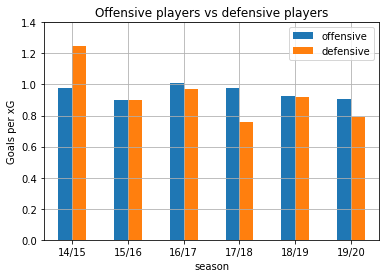

In [55]:
# Question 2: Does a offensive or defensive player has higher quotient of goals per expected goals
#

def get_goal_per_xgoal(df):
    df_g_per_xG_pos=df.groupby('position')['goals'].sum()/df.groupby('position')['xG'].sum()
    # drop Goalkeeper out of list
    df_g_per_xG_pos_no_gp = df_g_per_xG_pos.drop("GK").drop("GK S")
    # filter defensive postions and calculate mean goals per player 
    mean_g_per_XG_defensive = df_g_per_xG_pos_no_gp.filter(like='D', axis=0).mean()
    # get a list of all players with defensive position
    defensive_list = list(df_g_per_xG_pos_no_gp.filter(like='D', axis=0).index)
    # drop all defensive postions from df_goals_by_pos_no_gp and calculate mean goals per player 
    mean_g_per_XG_offensive = df_g_per_xG_pos_no_gp.drop(defensive_list).mean()
    
    return mean_g_per_XG_defensive, mean_g_per_XG_offensive
    

##create new df with with mean goals per player per season in offensive and defensive positions and plot
mean_g_per_XG_defensive19_20, mean_g_per_XG_offensive19_20 = get_goal_per_xgoal(df1920)
mean_g_per_XG_defensive18_19, mean_g_per_XG_offensive18_19 = get_goal_per_xgoal(df1819)
mean_g_per_XG_defensive17_18, mean_g_per_XG_offensive17_18 = get_goal_per_xgoal(df1718)
mean_g_per_XG_defensive16_17, mean_g_per_XG_offensive16_17 = get_goal_per_xgoal(df1617)
mean_g_per_XG_defensive15_16, mean_g_per_XG_offensive15_16 = get_goal_per_xgoal(df1516)
mean_g_per_XG_defensive14_15, mean_g_per_XG_offensive14_15 = get_goal_per_xgoal(df1415)



##create new df with with mean goals per player per season in offensive and defensive positions and plot
offensive = [mean_g_per_XG_offensive14_15, mean_g_per_XG_offensive15_16, mean_g_per_XG_offensive16_17,
             mean_g_per_XG_offensive17_18, mean_g_per_XG_offensive18_19, mean_g_per_XG_offensive19_20]

defensive = [mean_g_per_XG_defensive14_15, mean_g_per_XG_defensive15_16, mean_g_per_XG_defensive16_17,
             mean_g_per_XG_defensive17_18, mean_g_per_XG_defensive18_19, mean_g_per_XG_defensive19_20]

index = ['14/15', '15/16', '16/17', '17/18', '18/19', '19/20']

df = pd.DataFrame({'offensive': offensive,

                   'defensive': defensive}, index=index)

ax = df.plot.bar(rot=0, ylabel="Goals per xG", xlabel="season", 
                            grid=True, title='Offensive players vs defensive players')
ax.set_ylim(0,1.4)
df

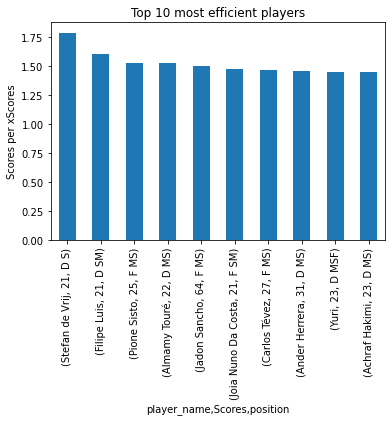

In [139]:
# Which are the 10 most efficient players in season 2019/2020
## append dfs of all seasons 
df = df1920.append(df1819).append(df1718).append(df1617).append(df1516).append(df1415)
# create new column with Scorer points 
df['ScorerPoints'] = df['goals'] + df['assists']
# create new column with expected Scorer points 
df['xScorerPoints'] = df['xG'] + df['xA']
# create new column with with ratio of scorers and expected Scorer points 
df_scores = (df.groupby("player_name")['ScorerPoints'].sum()/df.groupby("player_name")['xScorerPoints'].sum())
# create new df to get players who have more then 10 scorers
df_scores = pd.DataFrame({"ratio_S_xS": df_scores})
df_scores['Scores']=df.groupby("player_name")['ScorerPoints'].sum()
df_scores['position']=df.groupby("player_name")['position'].sum()
## delete duplicates
df_scores['position'] = df_scores.apply(lambda row: "".join(dict.fromkeys(row['position'])), axis=1)
df_scores = df_scores[df_scores.Scores > 20]
# group and plot
df_scores.groupby(['player_name',"Scores","position"])['ratio_S_xS'].sum() \
            .nlargest(10).plot(kind='bar', title='Top 10 most efficient players', ylabel='Scores per xScores')

In [132]:
df.groupby("player_name")['position'].sum()

player_name
Aaron Connolly                             F S
Aaron Cresswell             DD SD M SD M SD MD
Aaron Hunt                    F M SF M SM SM S
Aaron Lennon        M SM SF M SF M SF M SF M S
Aaron Leya Iseka                   F SF SF M S
                               ...            
Óscar Romero                            M SM S
Óscar Trejo                     F M SM SM SM S
Ömer Toprak                 D SD SD SDD M SD S
Özkan Yildirim                              SM
Ørjan Nyland                        GK SGK SGK
Name: position, Length: 5816, dtype: object

In [126]:
df_scores

,ratio_S_xS,Scores
player_name,,
Aaron Connolly,0.781931,4
Aaron Cresswell,1.139244,26
Aaron Hunt,0.889303,16
Aaron Lennon,1.135737,14
Aaron Leya Iseka,0.775760,8
...,...,...
Óscar Romero,0.424221,1
Óscar Trejo,0.926934,27
Ömer Toprak,0.551802,4
